In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download khoshbayani/news-texts

Dataset URL: https://www.kaggle.com/datasets/khoshbayani/news-texts
License(s): MIT
100% 7.39M/7.39M [00:01<00:00, 11.7MB/s]
100% 7.39M/7.39M [00:01<00:00, 7.15MB/s]


In [ ]:
#unzip file
! unzip news-texts.zip

Archive:  news-texts.zip
  inflating: news.csv                


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
df = pd.read_csv('news.csv')
df.head()

date                                               text  \
0  2018-01-04T15:35:56  Farmers will get subsidies for turning fields ...   
1  2018-01-04T15:35:57  Vanuatu bans non-biodegradable plastic to prot...   
2  2018-01-04T17:00:49  Ex-British PM Tony Blair ups calls for Labour ...   
3  2018-01-04T17:00:50  UK's Tony Blair argues voters deserve another ...   
4  2018-01-04T18:01:34  Germany had so much renewable energy over Chri...   

     label  
0  politic  
1  politic  
2  politic  
3  politic  
4  politic

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127393 entries, 0 to 127392
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    127393 non-null  object
 1   text    127375 non-null  object
 2   label   127393 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


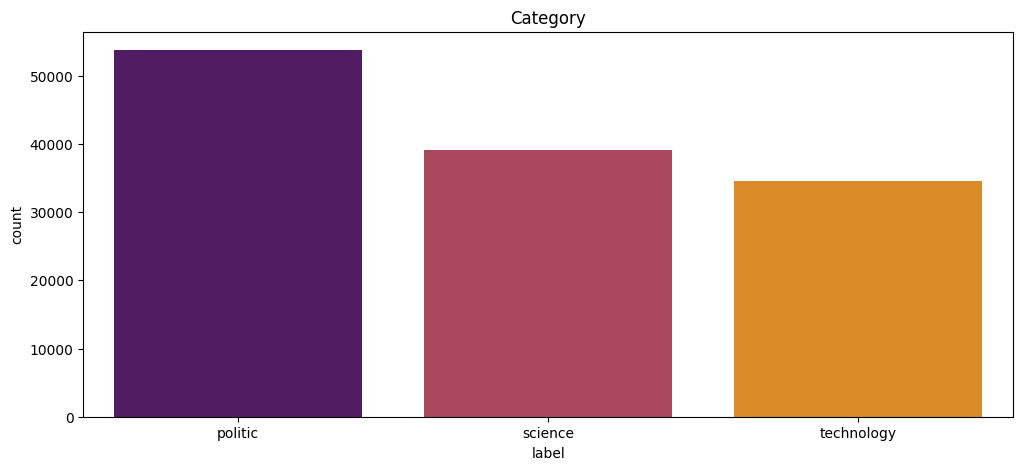

In [ ]:
# count the unique value
plt.figure(figsize = (12,5))
sns.countplot(data = df, x = 'label', palette = 'inferno')
plt.title("Category")
plt.tight_layout;

In [ ]:
# Label is not balance,let's see the percentage label
a = list(df['label'].unique())
for i in a:
    print("Percentage of",i,":", round((len(df[df['label']== i])/len(df))*100,2),"%")

Percentage of politic : 42.2 %
Percentage of science : 30.65 %
Percentage of technology : 27.15 %


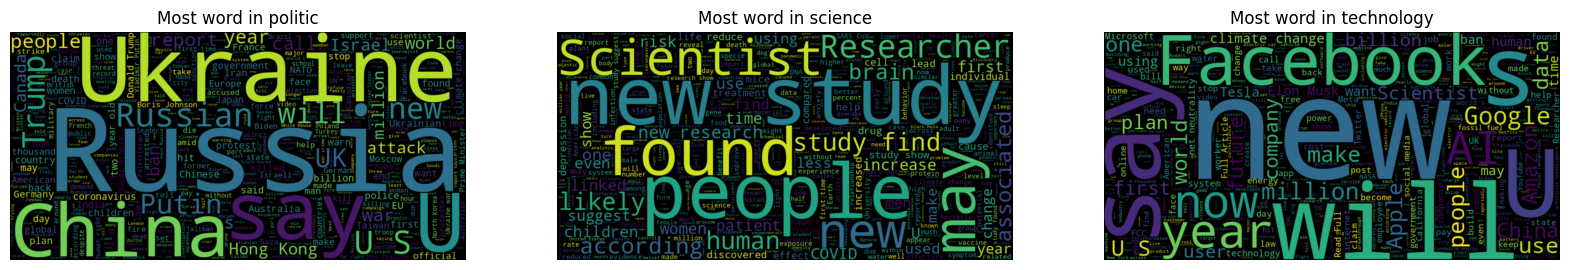

In [ ]:
# let's see common word for every categories
politic = df[df['label']=='politic']['text']
science = df[df['label']=='science']['text']
technology = df[df['label']=='technology']['text']
categories = [politic,science,technology]
plt.figure(figsize=(20,20))
list_category = list(df['label'].unique())
for i, x in enumerate(categories):
  plt.subplot(1,3, i+1)
  WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
  category = WC.generate(x.str.cat(sep=' '))
  plt.imshow(category, interpolation = 'bilinear')
  plt.axis('off')
  plt.title(f"Most word in {list_category[i]}")
plt.show()

In [ ]:
df['text'].loc[2]

'Ex-British PM Tony Blair ups calls for Labour to back Brexit U-turn - Former UK Prime Minister Blair has warned British voters time is running out to stop Brexit. An overwhelming majority of Labour members — although not their leaders or many voters — share his wish for a Brexit reversal.'

In [ ]:
df2 = df.copy()
df2.drop(columns=['date'], inplace = True)
df2.head()

text    label
0  Farmers will get subsidies for turning fields ...  politic
1  Vanuatu bans non-biodegradable plastic to prot...  politic
2  Ex-British PM Tony Blair ups calls for Labour ...  politic
3  UK's Tony Blair argues voters deserve another ...  politic
4  Germany had so much renewable energy over Chri...  politic

In [ ]:
df2['label'].value_counts()

label
politic       53762
science       39041
technology    34590
Name: count, dtype: int64

In [ ]:
balanced_df = df2.groupby('label').apply(lambda x: x.sample(n=34590,random_state = 42)).reset_index(drop=True)
balanced_df['label'].value_counts()

label
politic       34590
science       34590
technology    34590
Name: count, dtype: int64

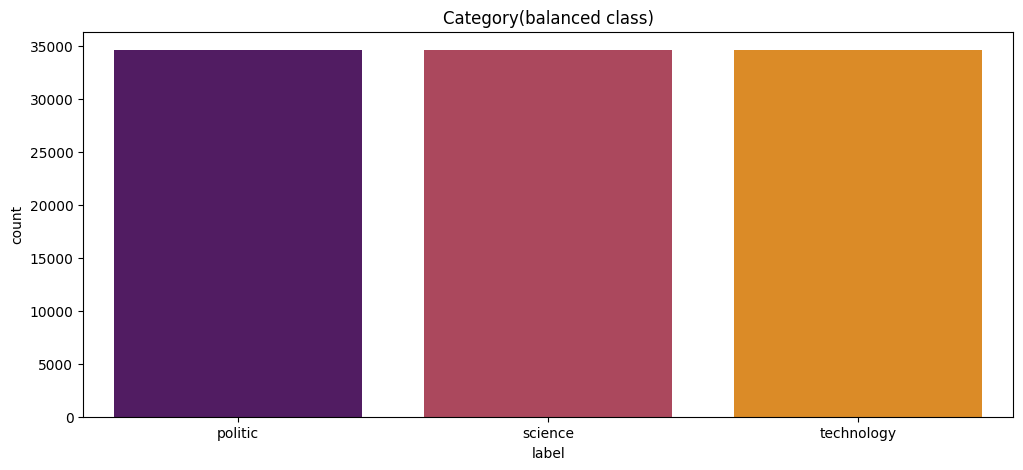

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(data = balanced_df, x = 'label', palette = 'inferno')
plt.title("Category(balanced class)")
plt.tight_layout;

In [ ]:
x = balanced_df
x['text'] = x['text'].astype(str).apply(lambda x: x.lower())
x

text       label
0       the 'anonymous' collective says it has hacked ...     politic
1       russia wants to teach its schoolchildren how t...     politic
2       china says the uk will "pay price" if huawei i...     politic
3       other countries should learn from a transgende...     politic
4       cars with russian number plates to be banned f...     politic
...                                                   ...         ...
103765  the anti-porn religious lobby just destroyed t...  technology
103766  r/futurology's official discord - a relaxed pl...  technology
103767  graphene, but not as you know it. researchers ...  technology
103768  trump's video game panel is stacked against th...  technology
103769  mit validates science behind new nuclear fusio...  technology

[103770 rows x 2 columns]

In [ ]:
import re
def remove_special_character(text, remove_digits=True):
  pattern = r'[^a-zA-z0-9\s]'
  text = re.sub(pattern,'',text)
  return text
x['text'] = x['text'].apply(remove_special_character)
x.head()

text    label
0  the anonymous collective says it has hacked th...  politic
1  russia wants to teach its schoolchildren how t...  politic
2  china says the uk will pay price if huawei is ...  politic
3  other countries should learn from a transgende...  politic
4  cars with russian number plates to be banned f...  politic

In [ ]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = stopwords.words('english')
#remove stopword
def remove_stopword(text,  is_lower_case = False):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword]
  filtered_text =' '.join(filtered_tokens)
  return filtered_text
x['text'] = x['text'].apply(remove_stopword)
x.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


text    label
0  anonymous collective says hacked central bank ...  politic
1  russia wants teach schoolchildren throw grenad...  politic
2    china says uk pay price huawei booted 5g builds  politic
3  countries learn transgender verdict england hi...  politic
4   cars russian number plates banned traffic latvia  politic

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize_text(text):
  st = WordNetLemmatizer()
  text = ' '.join([st.lemmatize(word) for word in text.split()])
  return text
x['text'] = x['text'].apply(lemmatize_text)
X = x['text'].to_numpy()
Y = x['label'].to_numpy()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,FunctionTransformer
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print(encoder.classes_)

['politic' 'science' 'technology']


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
smote = SMOTE(sampling_strategy={1:53762,
                                 2:53762})
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)
#X_train, y_train = smote.fit_resample(X_train,y_train)
vectorizer = TfidfVectorizer()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(83016,)
(83016,)
(20754,)
(20754,)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vectorizer', vectorizer),  # Langkah pertama: Vektorisasi teks
    ('classifier', XGBClassifier(random_state = 42))  # Langkah kedua: Klasifikasi
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      6960
           1       0.85      0.82      0.83      7010
           2       0.72      0.82      0.77      6784

    accuracy                           0.81     20754
   macro avg       0.81      0.81      0.81     20754
weighted avg       0.81      0.81      0.81     20754



In [ ]:
import joblib
from google.colab import files
joblib.dump(pipeline, 'news_classifier.pkl')
files.download('news_classifier.pkl')